In [ ]:
#Ganga Nutanaganti-9073-Heart disease prediction
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (1).csv
User uploaded file "Heart_Disease_Prediction (1).csv" with length 11928 bytes


In [ ]:
df = pd.read_csv("Heart_Disease_Prediction (1).csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumerical Columns:")
print(list(numerical_cols))

print("\nCategorical Columns:")
print(list(categorical_cols))


Numerical Columns:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

Categorical Columns:
['Heart Disease']


In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

print("\nBinary Columns:")
print(binary_cols)


Binary Columns:
['Sex', 'FBS over 120', 'Exercise angina', 'Heart Disease']


In [ ]:
df.shape

(270, 14)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
age,0
sex,0
chest_pain_type,0
bp,0
cholesterol,0
fbs_over_120,0
ekg_results,0
max_hr,0
exercise_angina,0
st_depression,0


In [ ]:
df['heart_disease'] = df['heart_disease'].map({
    'Presence': 1,
    'Absence': 0
})

df['heart_disease'].head()

,heart_disease
0,1
1,0
2,1
3,0
4,0


In [ ]:
df['bp'].describe()

,bp
count,270.000000
mean,131.344444
std,17.861608
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
print("Minimum BP:", df['bp'].min())
print("Maximum BP:", df['bp'].max())

Minimum BP: 94
Maximum BP: 200


In [ ]:
print("Blood Pressure Range:")
print("Min:", df['bp'].min())
print("Max:", df['bp'].max())

print("\nCholesterol Range:")
print("Min:", df['cholesterol'].min())
print("Max:", df['cholesterol'].max())

print("\nMaximum Heart Rate Range:")
print("Min:", df['max_hr'].min())
print("Max:", df['max_hr'].max())

Blood Pressure Range:
Min: 94
Max: 200

Cholesterol Range:
Min: 126
Max: 564

Maximum Heart Rate Range:
Min: 71
Max: 202


In [ ]:
print("Zero BP values:", (df['bp'] == 0).sum())
print("Negative BP values:", (df['bp'] < 0).sum())

Zero BP values: 0
Negative BP values: 0


In [ ]:
df[['bp', 'cholesterol', 'max_hr']].describe()

,bp,cholesterol,max_hr
count,270.000000,270.000000,270.000000
mean,131.344444,249.659259,149.677778
std,17.861608,51.686237,23.165717
min,94.000000,126.000000,71.000000
25%,120.000000,213.000000,133.000000
50%,130.000000,245.000000,153.500000
75%,140.000000,280.000000,166.000000
max,200.000000,564.000000,202.000000


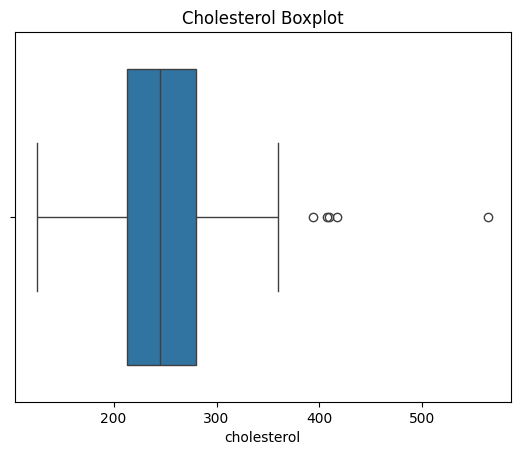

In [ ]:
sns.boxplot(x=df['cholesterol'])
plt.title("Cholesterol Boxplot")
plt.show()

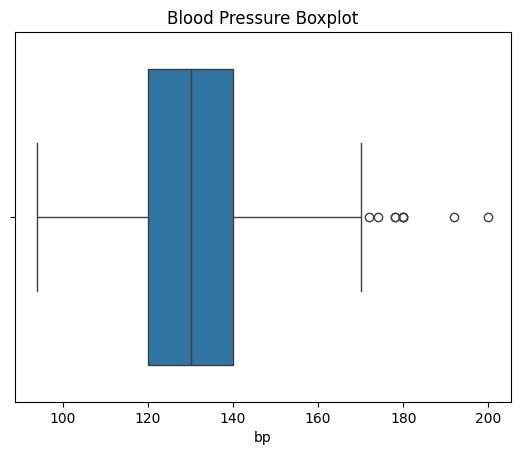

In [ ]:
sns.boxplot(x=df['bp'])
plt.title("Blood Pressure Boxplot")
plt.show()

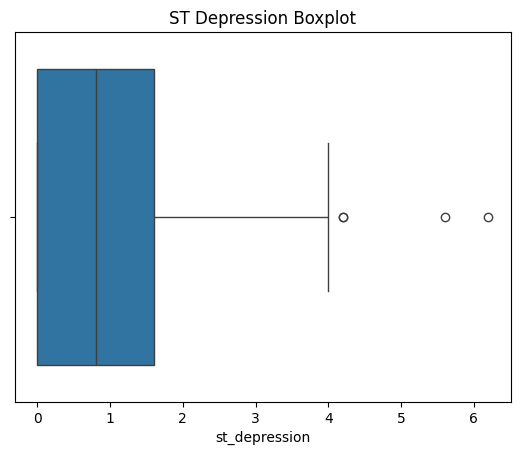

In [ ]:
sns.boxplot(x=df['st_depression'])
plt.title("ST Depression Boxplot")
plt.show()

In [ ]:
categorical_cols = ['chest_pain_type',
                    'ekg_results',
                    'thallium',
                    'slope_of_st']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

,age,sex,bp,cholesterol,fbs_over_120,max_hr,exercise_angina,st_depression,number_of_vessels_fluro,heart_disease,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,ekg_results_1,ekg_results_2,thallium_6,thallium_7,slope_of_st_2,slope_of_st_3
0,70,1,130,322,0,109,0,2.4,3,1,False,False,True,False,True,False,False,True,False
1,67,0,115,564,0,160,0,1.6,0,0,False,True,False,False,True,False,True,True,False
2,57,1,124,261,0,141,0,0.3,0,1,True,False,False,False,False,False,True,False,False
3,64,1,128,263,0,105,1,0.2,1,0,False,False,True,False,False,False,True,True,False
4,74,0,120,269,0,121,1,0.2,1,0,True,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_cols = ['age', 'bp', 'cholesterol',
                   'max_hr', 'st_depression']

df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

df.head()

,age,sex,bp,cholesterol,fbs_over_120,max_hr,exercise_angina,st_depression,number_of_vessels_fluro,heart_disease,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,ekg_results_1,ekg_results_2,thallium_6,thallium_7,slope_of_st_2,slope_of_st_3
0,1.712094,1,-0.075410,1.402212,0,-1.759208,0,1.181012,3,1,False,False,True,False,True,False,False,True,False
1,1.382140,0,-0.916759,6.093004,0,0.446409,0,0.481153,0,0,False,True,False,False,True,False,True,True,False
2,0.282294,1,-0.411950,0.219823,0,-0.375291,0,-0.656118,0,1,True,False,False,False,False,False,True,False,False
3,1.052186,1,-0.187590,0.258589,0,-1.932198,1,-0.743600,1,0,False,False,True,False,False,False,True,True,False
4,2.152032,0,-0.636310,0.374890,0,-1.240239,1,-0.743600,1,0,True,False,False,False,True,False,False,False,False


In [ ]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[-3, -0.5, 0.5, 3],
    labels=['Young', 'Middle-aged', 'Elderly']
)

df[['age', 'age_group']].head()

,age,age_group
0,1.712094,Elderly
1,1.382140,Elderly
2,0.282294,Middle-aged
3,1.052186,Elderly
4,2.152032,Elderly


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

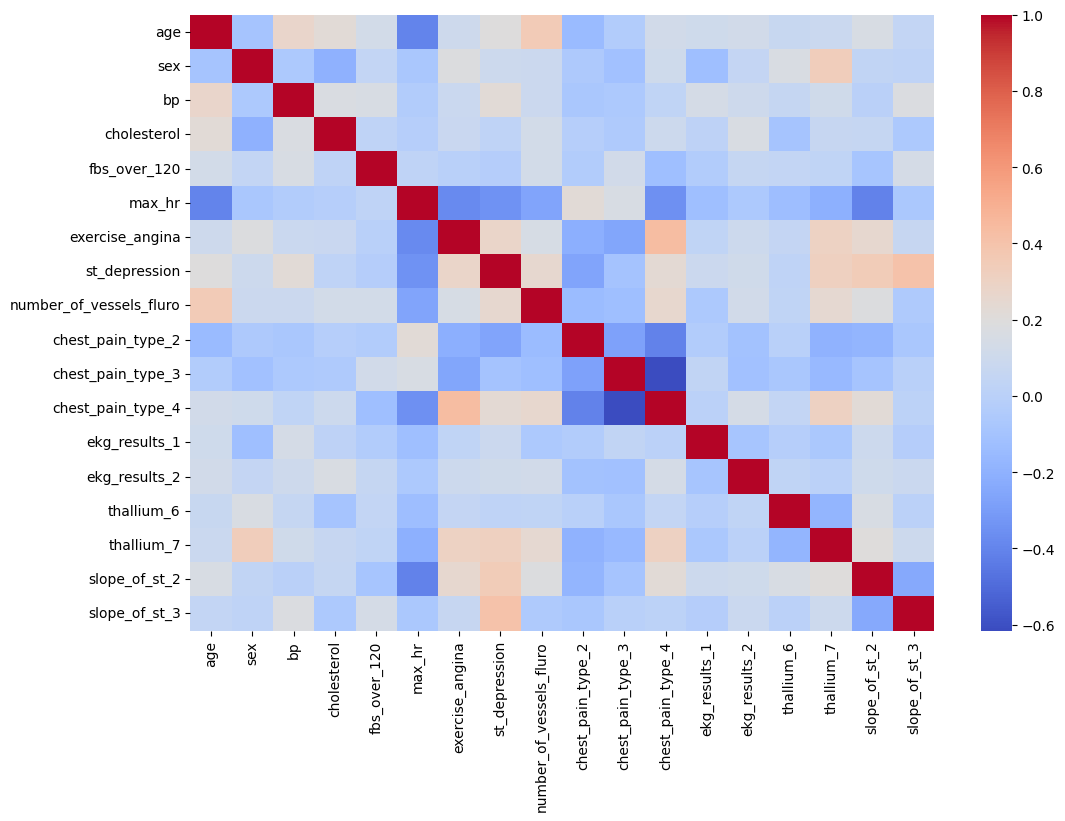

In [ ]:
corr_matrix = df.drop(columns=['heart_disease', 'age_group']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')

In [ ]:
X = df.drop(columns=['heart_disease', 'age_group'])
y = df['heart_disease']

In [ ]:
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (270, 13)
y shape: (270,)


In [ ]:
#B. Exploratory Data Analysis (EDA) Questions

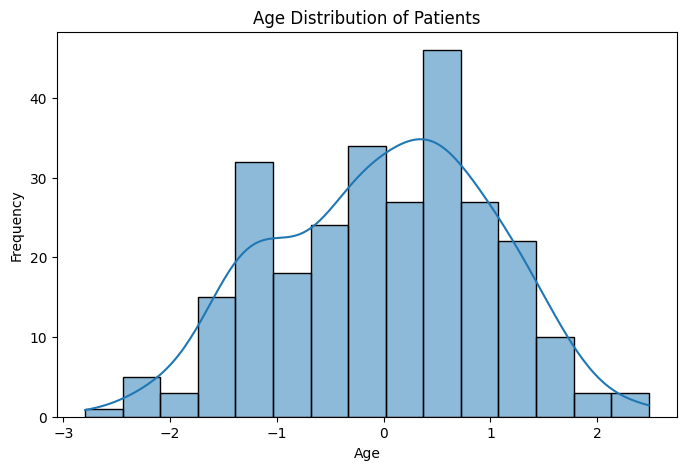

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

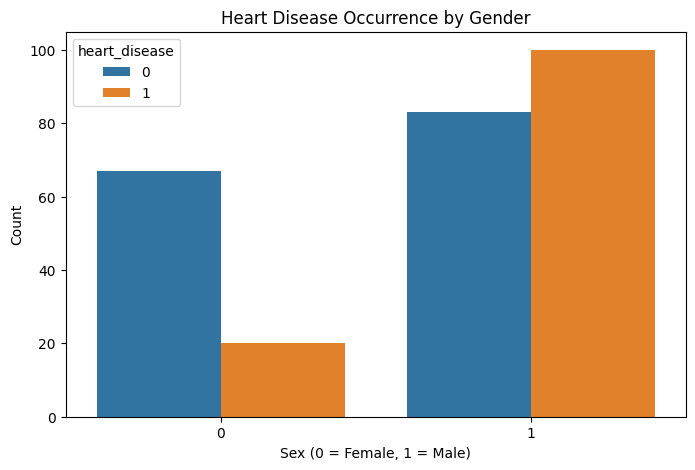

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex', hue='heart_disease', data=df)
plt.title("Heart Disease Occurrence by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

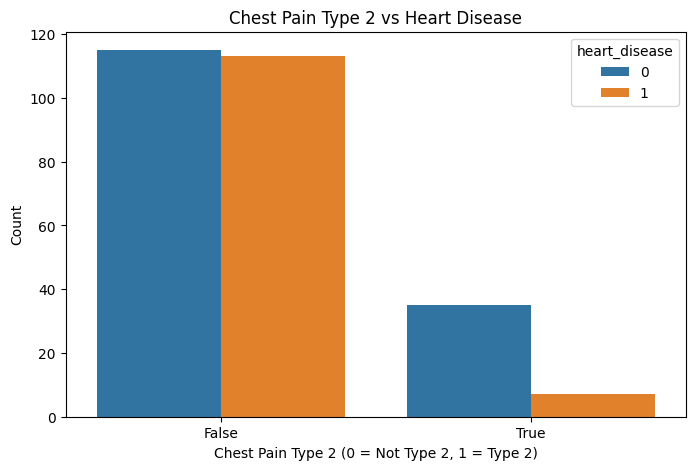

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='chest_pain_type_2', hue='heart_disease', data=df)
plt.title("Chest Pain Type 2 vs Heart Disease")
plt.xlabel("Chest Pain Type 2 (0 = Not Type 2, 1 = Type 2)")
plt.ylabel("Count")
plt.show()

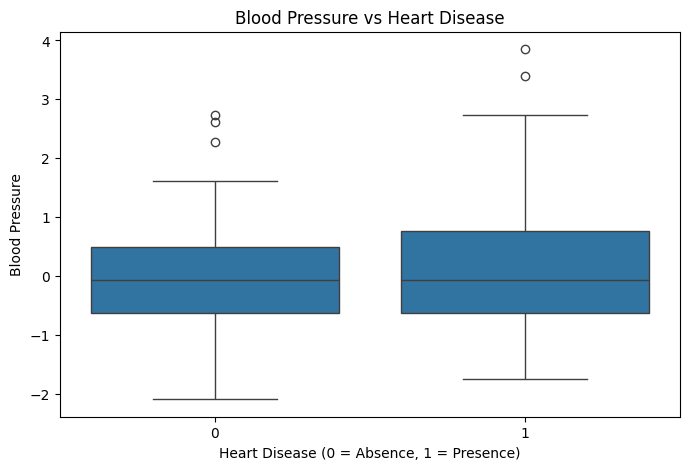

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='heart_disease', y='bp', data=df)
plt.title("Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("Blood Pressure")
plt.show()

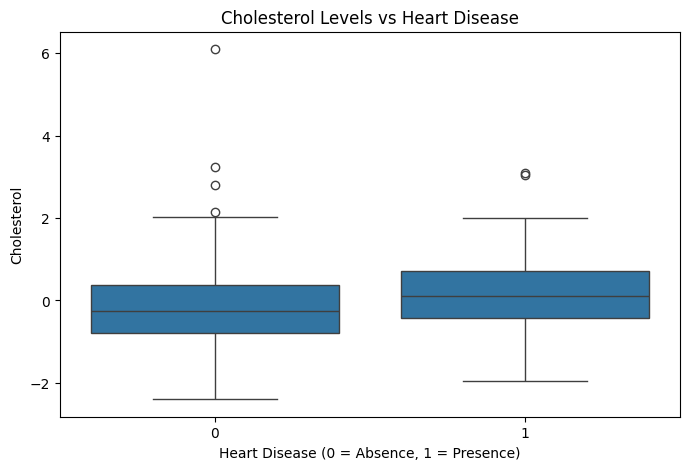

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='heart_disease', y='cholesterol', data=df)
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("Cholesterol")
plt.show()

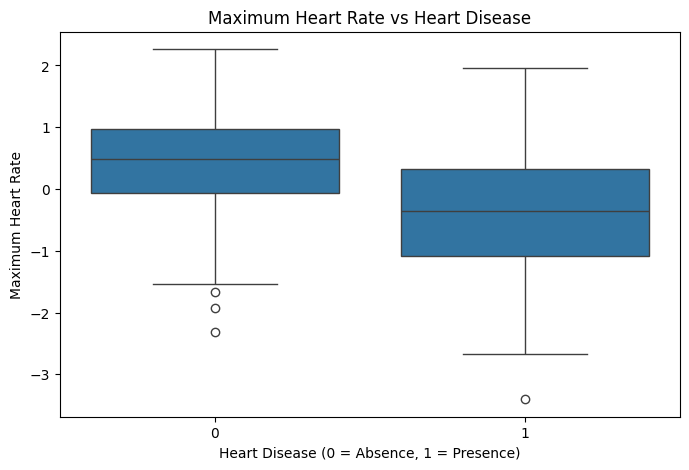

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='heart_disease', y='max_hr', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("Maximum Heart Rate")
plt.show()

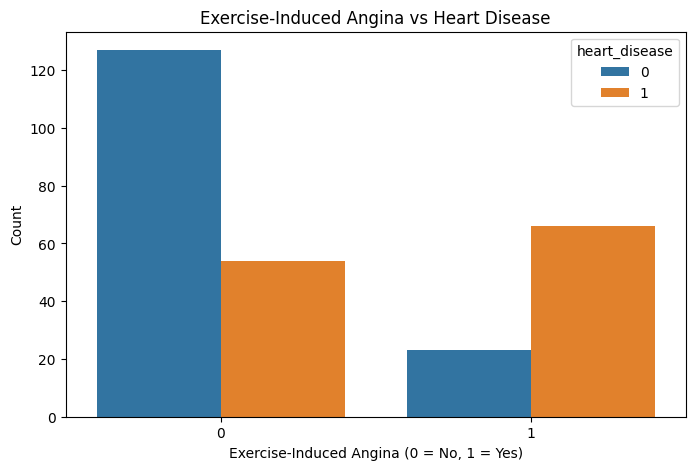

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='exercise_angina', hue='heart_disease', data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

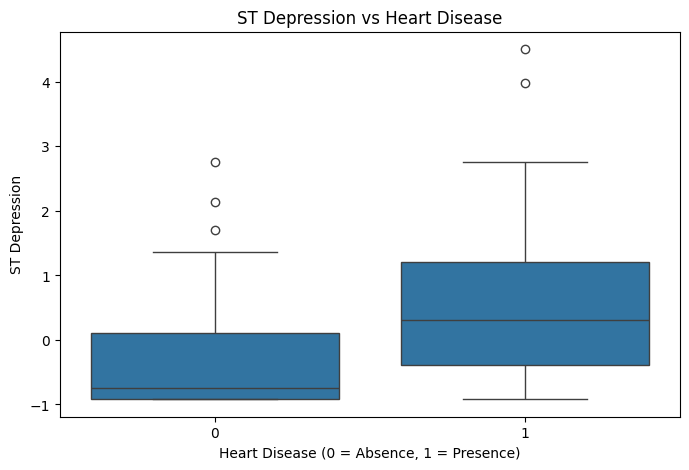

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='heart_disease', y='st_depression', data=df)
plt.title("ST Depression vs Heart Disease")
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("ST Depression")
plt.show()

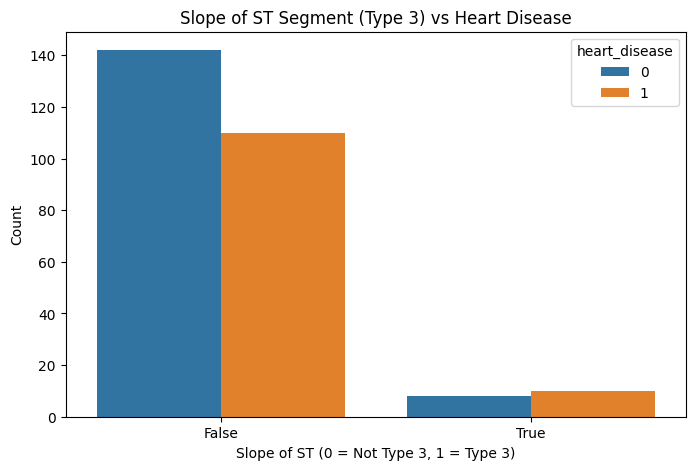

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='slope_of_st_3', hue='heart_disease', data=df)
plt.title("Slope of ST Segment (Type 3) vs Heart Disease")
plt.xlabel("Slope of ST (0 = Not Type 3, 1 = Type 3)")
plt.ylabel("Count")
plt.show()

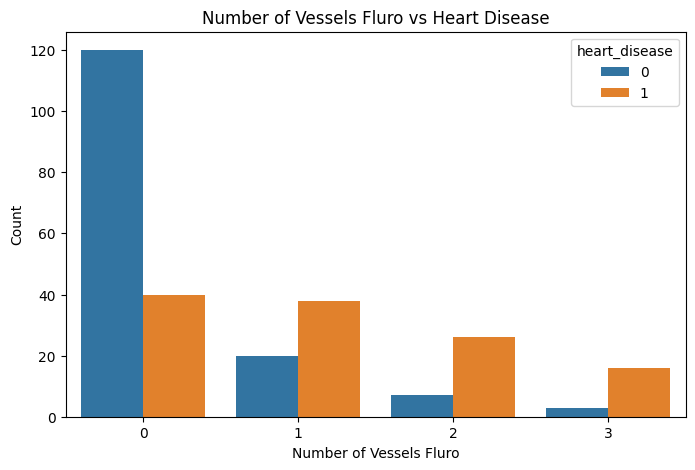

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='number_of_vessels_fluro', hue='heart_disease', data=df)
plt.title("Number of Vessels Fluro vs Heart Disease")
plt.xlabel("Number of Vessels Fluro")
plt.ylabel("Count")
plt.show()

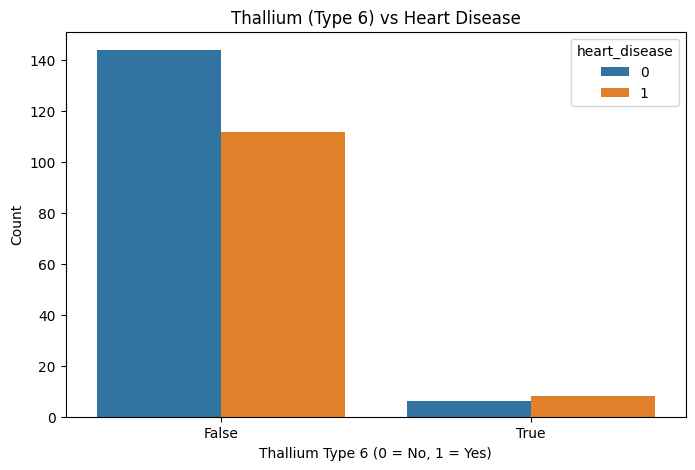

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='thallium_6', hue='heart_disease', data=df)
plt.title("Thallium (Type 6) vs Heart Disease")
plt.xlabel("Thallium Type 6 (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

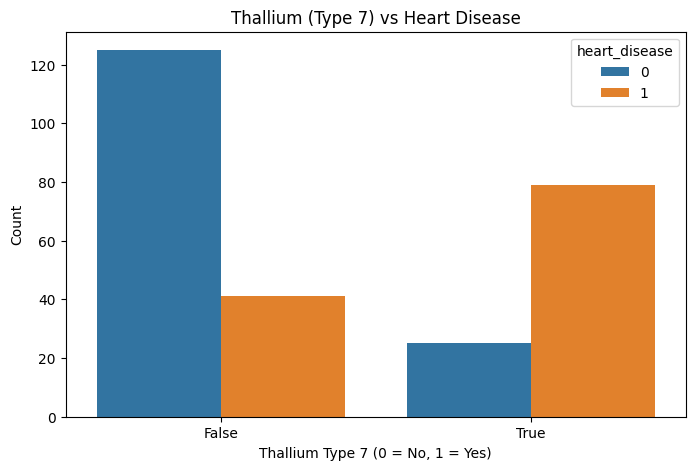

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='thallium_7', hue='heart_disease', data=df)
plt.title("Thallium (Type 7) vs Heart Disease")
plt.xlabel("Thallium Type 7 (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

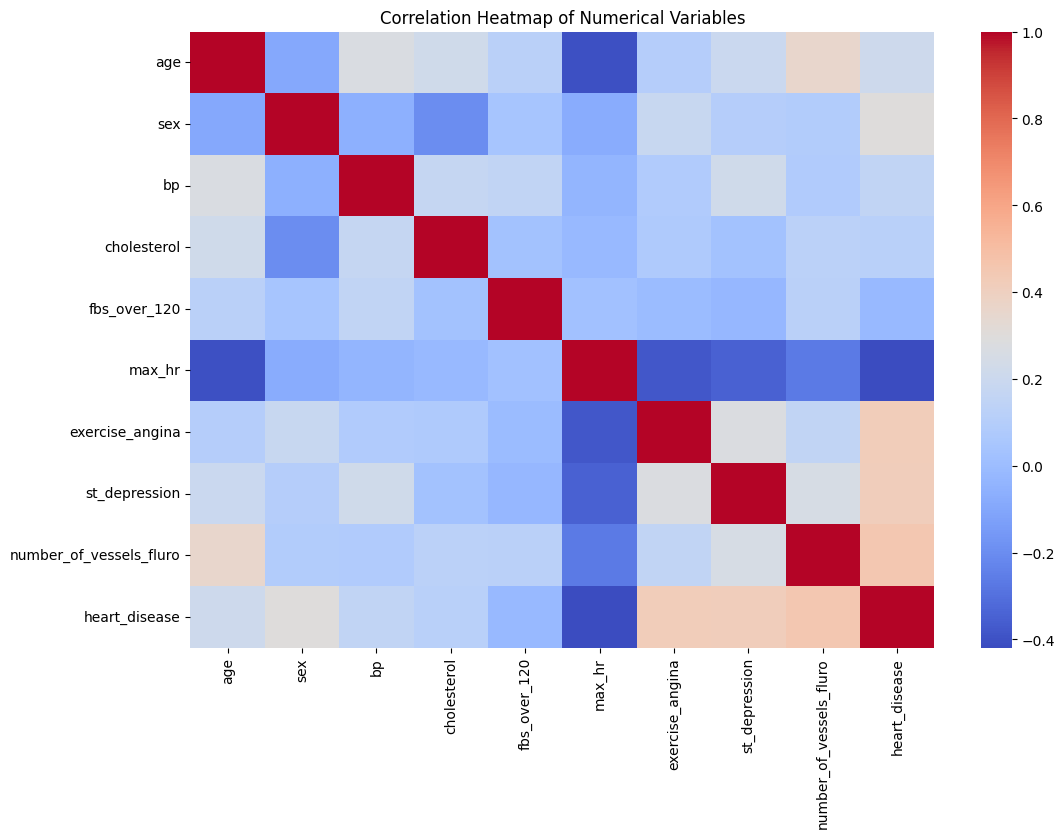

In [ ]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [ ]:
corr_target = df.drop(columns=['age_group']).corr()['heart_disease'].abs().sort_values(ascending=False)
corr_target

,heart_disease
heart_disease,1.000000
chest_pain_type_4,0.502369
thallium_7,0.502038
number_of_vessels_fluro,0.455336
exercise_angina,0.419303
max_hr,0.418514
st_depression,0.417967
slope_of_st_2,0.356113
sex,0.297721
chest_pain_type_3,0.296717


In [ ]:
top_features = corr_target[1:4]
top_features

,heart_disease
chest_pain_type_4,0.502369
thallium_7,0.502038
number_of_vessels_fluro,0.455336


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

In [ ]:
# Ensure 'age_group' is dropped from X if it somehow persisted
if 'age_group' in X.columns:
    X = X.drop(columns=['age_group'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[33  0]
 [ 7 14]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8703703703703703


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        33
           1       1.00      0.67      0.80        21

    accuracy                           0.87        54
   macro avg       0.91      0.83      0.85        54
weighted avg       0.89      0.87      0.86        54

